<a href="https://colab.research.google.com/github/Urusha-Bajracharya3950/engg680_2024_fall/blob/main/Lab_assignment4/Assignment%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | First Name | Last Name | Signature | Hours | Contribution |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [1]:
# some library imports
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [3]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe
# uncomment and compelete below
cv_set = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_assignment4/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_assignment4/UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_assignment4/2020-03-14-16-45-35.csv')

cv_set.head(), test_set1.head(), test_set2.head()

(     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
 0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
 1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   
 2 -0.008014  0.037066  9.792780 -0.001129  0.001207  0.005840  9.805465   
 3 -0.097655  0.286081  9.781135 -0.000960  0.002518  0.076946  9.792874   
 4 -0.239673  0.288418  9.779307 -0.001625  0.005648  0.157407  9.794137   
 
       g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
 0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
 1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   
 2  0.024407  1.128046e-06  4.231253e-07  ...  0.000003  0.003009  0.002097   
 3  0.080408  7.988949e-07  6.873045e-08  ...  0.000052  0.001546  0.001457   
 4  0.158930  8.240663e-07  1.143863e-07  ...  0.000233  0.001387  0.001681   
 
      az_max    gx_max    gy_max    gz_max     a_max     g_max  mo

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [4]:
# TODO: Display first two rows of cv_set
# (1 mark)
print("First two rows of cv_set:")
print(cv_set.head(2))

First two rows of cv_set:
     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [5]:
# TODO: Load the info method of cv_set
# (1 mark)
cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [6]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [7]:
# TODO: Display all columns in cv_set
# (1 mark)
print("All columns in 'cv_set':")
print(cv_set.columns.tolist())

All columns in 'cv_set':
['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum', 'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min', 'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max', 'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state']


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [8]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

print("First few entries in target vector 'y':")
print(y.head())

First few entries in target vector 'y':
0        rest
1        rest
2    straight
3        turn
4        turn
Name: motion_state, dtype: object


From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [9]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [11]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1073, 32), y_train shape: (1073,)
X_test shape: (461, 32), y_test shape: (461,)


Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [12]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

print("Pipeline initialized:")
print(pipe)

Pipeline initialized:
Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])


Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [13]:
# TODO - Setup grid set
# (4 marks)

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}
print("Parameter grid configuration:")
print(param_grid)

Parameter grid configuration:
{'scaler': [StandardScaler(), RobustScaler(), None], 'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__gamma': [0.001, 0.01, 0.1, 1], 'classifier__kernel': ['rbf']}


In [14]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

grid.fit(X_train, y_train)

print("Best parameters found:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

Best parameters found: {'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}
Best cross-validation accuracy: 0.9496718104759834


___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [15]:
# TODO: Print the results from the grid search
# (2 marks)


grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
test_score = grid_search.best_estimator_.score(X_test, y_test)

print("Best params:\n{}".format(best_params))
print("Best cross-validation train score: {:.2f}".format(best_score))
print("Best cross-validation validation score: {:.2f}".format(grid_search.cv_results_['mean_test_score'][grid_search.best_index_]))
print("Test-set score: {:.2f}".format(test_score))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}
Best cross-validation train score: 0.95
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

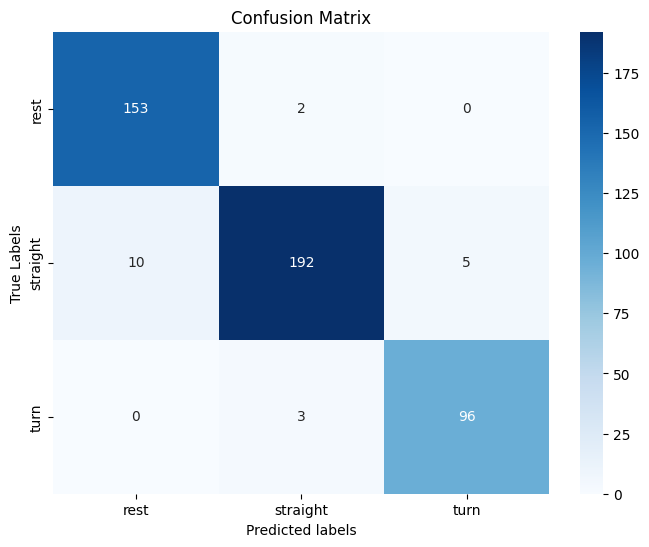

Classification Report:

              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [16]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_test_pred = grid.best_estimator_.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_test_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1.The model fits the dataset very well, achieving a high test-set accuracy of 96% and minimal misclassifications. The consistency between cross-validation and test-set accuracy indicates good generalization. High precision, recall, and F1-scores for all classes show balanced performance. Overall, the model demonstrates neither overfitting nor underfitting.


2.  The intervals for C and gamma are suitable, as the best parameters (C=100, gamma=0.01) fall within the tested range. However, C=100 being the maximum suggests testing higher values (e.g., 500) could refine results. The gamma range captures the optimal value well, confirming its appropriateness. The intervals effectively balance exploration and performance optimization.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [17]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [18]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])

print(X2.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.046400  0.305907  9.791451 -0.002184  0.001311 -0.001901  9.800683   
1 -0.050073  0.311947  9.785619 -0.003369  0.001898 -0.002051  9.797741   

      g_sum    ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.012437  0.000002  3.020959e-07  ...  0.048406  0.000007  0.002575   
1  0.013805  0.000003  6.859937e-07  ...  0.047696  0.000013  0.003880   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  
0  0.002993  0.049701  0.000094  0.000115  0.000080  0.049764  0.000142  
1  0.004106  0.050477  0.000140  0.000140  0.000083  0.050763  0.000151  

[2 rows x 32 columns]


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [19]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

test_set1_score = grid.best_estimator_.score(X1, y1)
test_set2_score = grid.best_estimator_.score(X2, y2)

print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

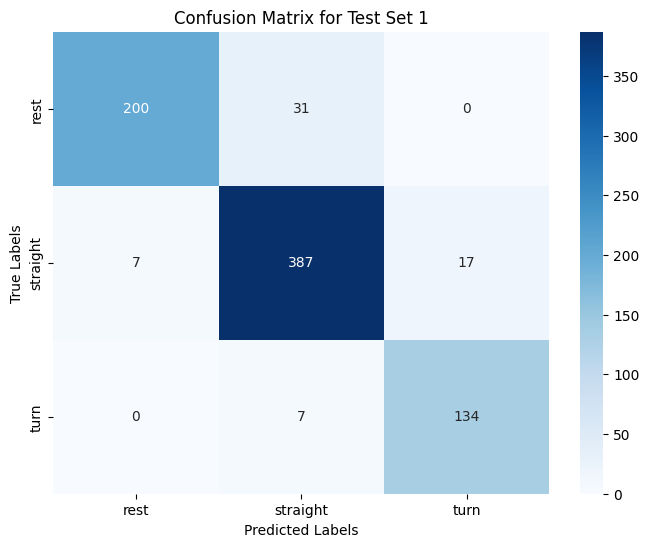

Classification Report for Test Set 1:

              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [20]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
y1_pred = grid.best_estimator_.predict(X1)

conf_matrix_1 = confusion_matrix(y1, y1_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

print("Classification Report for Test Set 1:\n")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

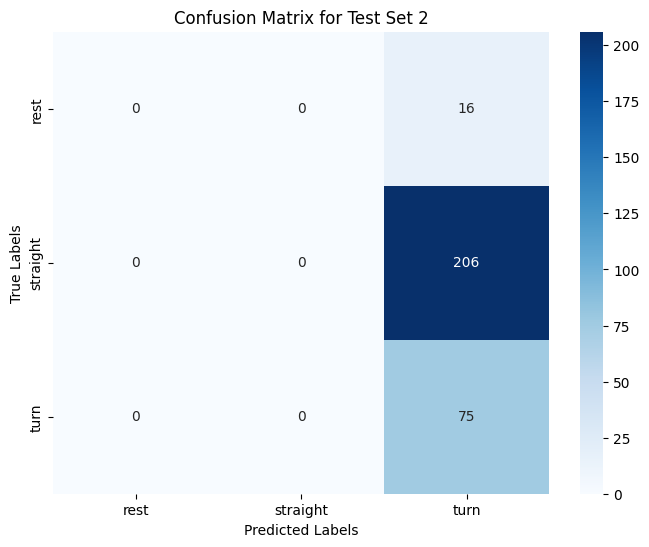

Classification Report for Test Set 2:

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.best_estimator_.predict(X2)

conf_matrix_2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set 2')
plt.show()

print("Classification Report for Test Set 2:\n")
print(classification_report(y2, y2_pred))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1.

**(X_test, y_test):** The model demonstrates strong generalization with an accuracy of 96%. Precision, recall, and F1-scores are well-balanced, indicating that the model is effectively handling the classes and that the data distribution is well-represented in the training set.

**(X1, y1):** The model achieves an accuracy of 92%, suggesting that it generalizes well but with a slight reduction in performance. The minor performance drop could be attributed to subtle differences between the training dataset and X1.

**(X2, y2):** The model’s accuracy drops significantly to 25%, where it predominantly predicts the "turn" class. This sharp decline in performance signals a poor generalization to X2, likely due to significant distributional differences between the training data and X2.

2.

The model performs well on (X_test, y_test) with 96% accuracy and balanced precision/recall, indicating good generalization. It achieves slightly lower accuracy (92%) on (X1, y1) but still performs well, suggesting a moderate alignment with training data. However, it performs poorly on (X2, y2) with 25% accuracy, failing to generalize. This disparity exemplifies dataset shift, where the test data distribution differs from the training data.

**Potential Causes for Observed Behavior:**
1.	**Data Distribution Shift:** Features or class distributions in X2 may differ significantly from training data.
2.	**Insufficient Training Diversity:** Training data may not fully capture the variations present in X2.
3.	**Overfitting:** The model might have learned patterns specific to training data, limiting its ability to generalize to unseen distributions.


___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [22]:
# TODO - Load selected features from cv_set to X
# (1 marks)
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [23]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
y.head()

,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [24]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

#Setting up Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

#Defining the parameter grid for Hyperparameter tuning
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

#Initializing GridSearchCV
grid = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    return_train_score = True
)

#Fitting the model
grid.fit(X, y)

#Displaying the best parameter and the best score
print("Best parameters found:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

Best parameters found: {'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
Best cross-validation accuracy: 0.8109556960677866


___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [25]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.best_estimator_.score(X, y)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}

Best cross-validation train score: 0.86
Best cross-validation validation score: 0.81
Test-set score: 0.86


Display the confusion matrix and print the classification report for the trained model using the *test* split.

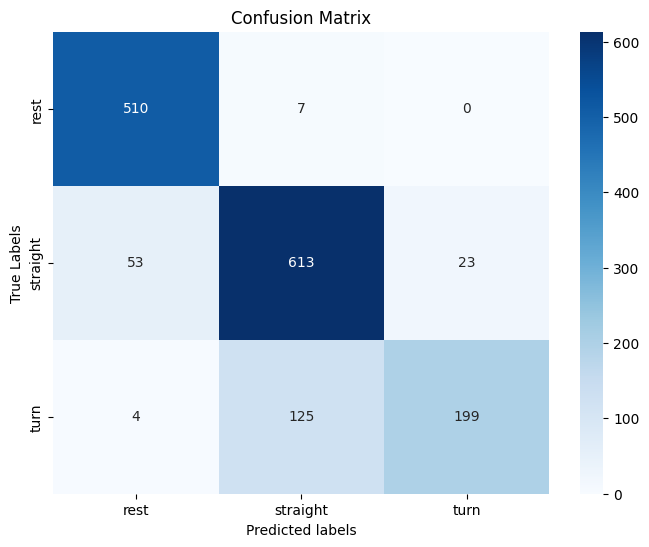

Classification Report:

              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       517
    straight       0.82      0.89      0.85       689
        turn       0.90      0.61      0.72       328

    accuracy                           0.86      1534
   macro avg       0.87      0.83      0.84      1534
weighted avg       0.86      0.86      0.86      1534



In [26]:
# TODO - Display confusion matrix and print classification reports

import sklearn.metrics as confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Predicting on the Dataset
y_pred = grid.best_estimator_.predict(X)

#Computing the Confusion Matrix
conf_matrix = confusion_matrix.confusion_matrix(y, y_pred)

#Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#Printing the Classification Report
print("Classification Report:\n")
print(classification_report(y, y_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1.
1.	**Section 1 (Full Features):**

Cross-Validation Accuracy: 95% (from grid search in section 1).

Test-Set Accuracy: 96%.

The model performs exceptionally well, with minimal overfitting and strong generalization across all datasets.

2.	**Section 2 (Selected Features):**

Cross-Validation Accuracy: 81%.

Test-Set Accuracy: 86%.

The model performs reasonably well but shows reduced accuracy, likely due to the limited feature set.


**Conclusion:**

The model from Section 1 (Full Features) is a better fit based on these evaluations. It achieves significantly higher accuracy and better generalization compared to the model in Section 2, which is constrained by fewer features and may lack the ability to fully capture the underlying patterns in the data.


___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [27]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [28]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [29]:
# TODO - Print test score accuracies for test_set1 and test_set2
test_set1_score = grid.best_estimator_.score(X1, y1)
test_set2_score = grid.best_estimator_.score(X2, y2)

#Printing the test score
print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.83
test_set2 score: 0.82


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

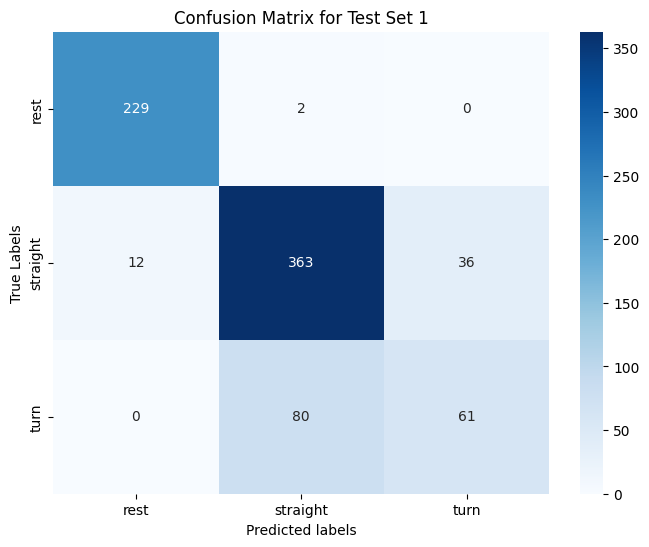

Classification Report for Test Set 1:

              precision    recall  f1-score   support

        rest       0.95      0.99      0.97       231
    straight       0.82      0.88      0.85       411
        turn       0.63      0.43      0.51       141

    accuracy                           0.83       783
   macro avg       0.80      0.77      0.78       783
weighted avg       0.82      0.83      0.82       783



In [30]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

import sklearn.metrics as confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Predicting on test_set1
y1_pred = grid.best_estimator_.predict(X1)

#Computing the Confusion Matrix
conf_matrix_1 = confusion_matrix.confusion_matrix(y1, y1_pred)

#Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

#Printing the Classification Report
print("Classification Report for Test Set 1:\n")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

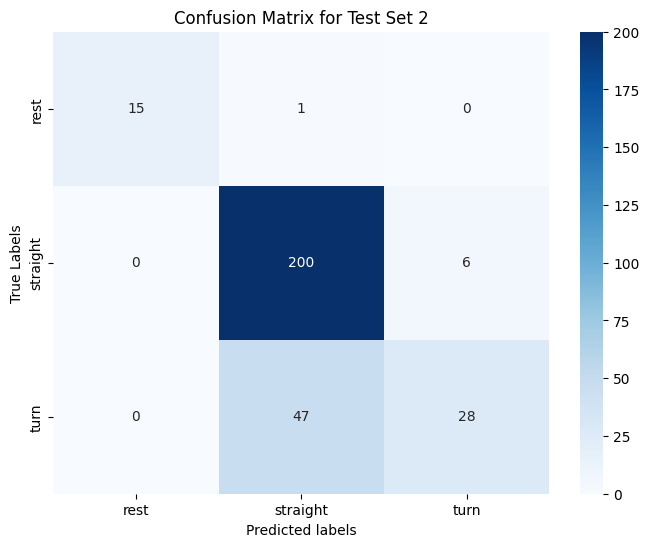

Classification Report for Test Set 2:

              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.81      0.97      0.88       206
        turn       0.82      0.37      0.51        75

    accuracy                           0.82       297
   macro avg       0.88      0.76      0.79       297
weighted avg       0.82      0.82      0.79       297



In [31]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
#Predicting on test_set2
y2_pred = grid.best_estimator_.predict(X2)

#Computing the Confusion Matrix
conf_matrix_2 = confusion_matrix.confusion_matrix(y2, y2_pred)

#Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set 2')
plt.show()

#Printing the Classification Report
print("Classification Report for Test Set 2:\n")
print(classification_report(y2, y2_pred))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1.

1.	**Training/Validation Performance (2.1):**

Validation Accuracy: 81%.

Indicates the model fits reasonably well to the selected features on the training data but with some limitations due to feature reduction.

2.	**Testing Performance (2.2):**

Test Set 1 Accuracy: 83% — slightly higher than validation accuracy, suggesting good generalization to similar datasets.

Test Set 2 Accuracy: 82% — comparable but shows reduced recall for the "turn" class, reflecting minor overfitting to the training data.

**Conclusion:**

 The model fits well with the selected features, generalizing effectively to the test datasets. However, some loss in performance, especially for specific classes, highlights the impact of reduced feature diversity.

2.1.	**Section 1 (Full Features):**

Validation Accuracy: 95%.

Testing Accuracy: 96% on Test Set 1, but poor on Test Set 2 (25%) due to dataset shift.

Better fit to training data and similar datasets but fails on mismatched distributions.


2.	**Section 2 (Selected Features):**

Validation Accuracy: 81%.

Testing Accuracy: Consistent across both test sets (83% and 82%).

More robust generalization but limited overall accuracy due to reduced feature set.

**Conclusion: **

The Section 1 model performs better for datasets similar to the training set but struggles with distribution shifts. The Section 2 model, while less accurate, generalizes more consistently across all datasets, indicating a better balance between fit and robustness.


____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.  gx_var (Variance of gyroscope readings in x):

2.	gy_sum (Sum of gyroscope readings in y):

3.	ax_min (Minimum accelerometer readings in x):

4.	ay_max (Maximum accelerometer readings in y):

5.	gz_sum (Sum of gyroscope readings in z):

**Justification:**
1.	Relevance to Motion States:
These features focus on rotational activity and changes in acceleration, crucial for distinguishing between dynamic states like "turn" and "straight."
2.	Non-Overlap with Previous Features: None of the selected features (gx_var, gy_sum, ax_min, ay_max, gz_sum) were used in earlier models, ensuring diversity.
3.	Coverage of Key Metrics: The features provide a balanced mix of minimum, maximum, variance, and summed values, offering a comprehensive view of motion data.
4.	Potential to Improve Performance: These features target nuances in rotational and vertical motion, which could improve the classification of challenging classes like "turn."


In [32]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['gx_var', 'gy_sum', 'ax_min', 'ay_max', 'gz_sum']]
X.head(2)

,gx_var,gy_sum,ax_min,ay_max,gz_sum
0,2.365611e-09,0.001406,-0.001539,0.000544,-0.001391
1,2.242613e-09,0.000103,-0.001752,0.000615,-0.001943


In [33]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
y.head()

,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [34]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

#setting up the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

#Defining the Parameter Grid for Hyperparameter Tuning
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

#Initialising GridSearchCV
grid = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    return_train_score = True
)

#Performing Grid Search on the Selected Features
grid.fit(X, y)

#Displaying the Best Parameters and Best Score
print("Best parameters found:", grid.best_params_)
print("Best cross-validation Score:", grid.best_score_)

Best parameters found: {'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
Best cross-validation Score: 0.916557024547061


___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [35]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.best_estimator_.score(X,y)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}

Best cross-validation train score: 0.95
Best cross-validation validation score: 0.92
Test-set score: 0.95


Display the confusion matrix and print the classification report for the trained model using the *test* split.

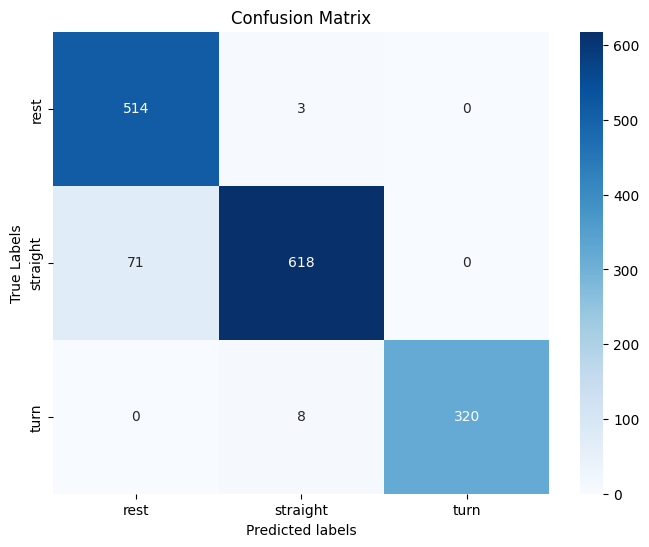

Classification Report:

              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       517
    straight       0.98      0.90      0.94       689
        turn       1.00      0.98      0.99       328

    accuracy                           0.95      1534
   macro avg       0.95      0.96      0.95      1534
weighted avg       0.95      0.95      0.95      1534



In [36]:
# TODO - Display confusion matrix and print classification report

import sklearn.metrics as confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Predicting on the Dataset
y_pred = grid.best_estimator_.predict(X)

#Computing the Confusion Matrix
conf_matrix = confusion_matrix.confusion_matrix(y, y_pred)

#Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#Printing the Classification Report
print("Classification Report:\n")
print(classification_report(y, y_pred))

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [37]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['gx_var', 'gy_sum', 'ax_min', 'ay_max', 'gz_sum']]
X1.head(2)

,gx_var,gy_sum,ax_min,ay_max,gz_sum
0,3.655217e-09,0.000218,-0.001191,0.000845,-0.001143
1,3.349120e-09,-0.000523,-0.001104,0.000949,-0.001999


In [38]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['gx_var', 'gy_sum', 'ax_min', 'ay_max', 'gz_sum']]
X2.head(2)

,gx_var,gy_sum,ax_min,ay_max,gz_sum
0,1.718706e-09,0.001311,-0.002970,0.002993,-0.001901
1,2.179497e-09,0.001898,-0.003824,0.004106,-0.002051


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [39]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.best_estimator_.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.best_estimator_.score(X2, y2)))

test_set1 score: 0.78
test_set2 score: 0.72


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

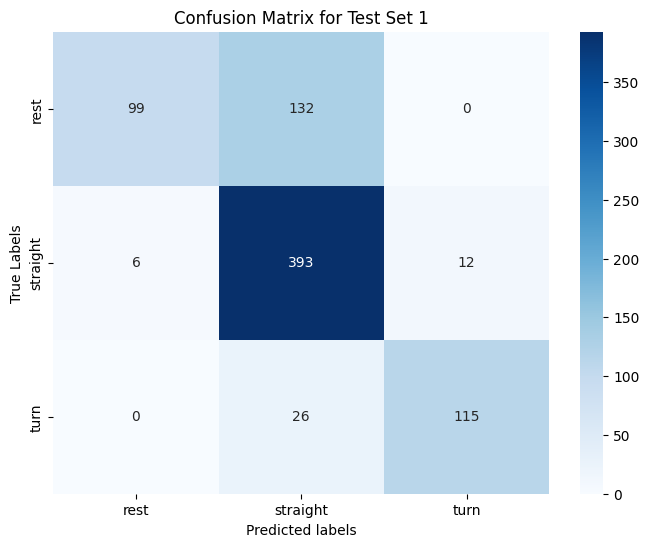

Classification Report for Test Set 1:

              precision    recall  f1-score   support

        rest       0.94      0.43      0.59       231
    straight       0.71      0.96      0.82       411
        turn       0.91      0.82      0.86       141

    accuracy                           0.78       783
   macro avg       0.85      0.73      0.75       783
weighted avg       0.82      0.78      0.76       783



In [40]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Get Predictions for test_set1
y1_pred = grid.best_estimator_.predict(X1)

#Compute the Confusion Matrix
conf_matrix_1 = confusion_matrix(y1, y1_pred)

#Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

#Print classification Report for test_set1
print("Classification Report for Test Set 1:\n")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

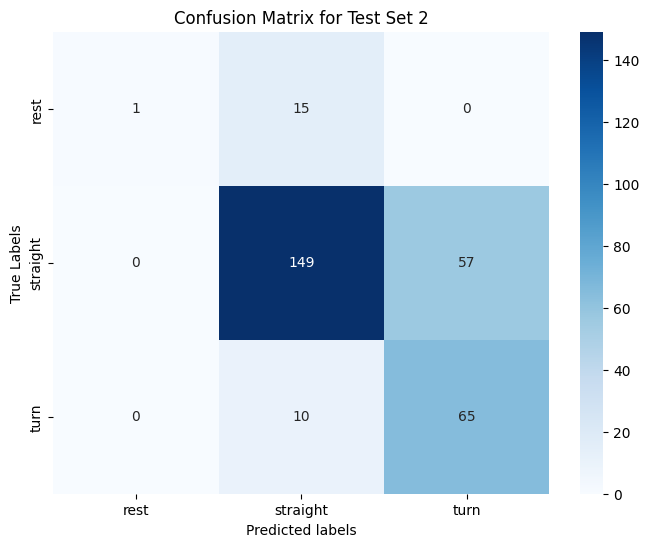

Classification Report for Test Set 2:

              precision    recall  f1-score   support

        rest       1.00      0.06      0.12        16
    straight       0.86      0.72      0.78       206
        turn       0.53      0.87      0.66        75

    accuracy                           0.72       297
   macro avg       0.80      0.55      0.52       297
weighted avg       0.78      0.72      0.72       297



In [41]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Generate confusion matrix for test_set2
y2_pred = grid.best_estimator_.predict(X2)

#Compute the Confusion Matrix
conf_matrix_2 = confusion_matrix(y2, y2_pred)

#Plot the Confusion Matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set 2')
plt.show()

#Print classification report for test_set2
print("Classification Report for Test Set 2:\n")
print(classification_report(y2, y2_pred))

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.

**1.
Section 1 vs Section 3**
Section 1 performs slightly better on both test sets (0.81 for test_set1 and 0.74 for test_set2), suggesting it benefits from having more features.
Section 3 shows a slight decrease in accuracy (0.78 for test_set1 and 0.72 for test_set2), but it may offer better generalization with fewer features.
Section 1 has higher accuracy but 3 might be more efficient less overfitting with fewer features.

**2.
Section 2 vs Section 3**
Section 2 shows higher accuracy on test_set1 (0.78) compared to Section 3 (0.78), but a drop in test_set2 (0.72) for Section 3, compared to test_set2 (0.74) for Section 2.
Both models have similar performance on test_set1, with the difference being minimal. However, Section 2 performs slightly better overall in terms of test_set2.
Section 3 includes features like gx_var, gy_sum, and ax_min, which might capture important motion dynamics, but Section 2 with the other selected features seems to perform slightly better in both precision and recall for test_set2.
In conclusion, Section 2 outperforms Section 3 on test_set2, while they perform similarly on test_set1.

**2.**

**Feature Selection:** In Section 2 and Section 3, the selected features likely focused on more relevant variables, improving performance by reducing noise compared to Section 1, where all features were used.


**Relevance of Features:** Features in Section 2 (ax_var, ay_var, etc.) might be more effective at capturing key motion patterns, leading to better results, while Section 3's features (gx_var, gy_sum, etc.) might have been less informative for certain datasets.


**Overfitting vs. Generalization:** Section 1, with more features, could have overfitted to the training data, while Section 2 and Section 3 models, using fewer, more relevant features, generalized better to the test sets.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [42]:
# TODO - Load all features from cv_set to X
# X =
X.head(2)

,gx_var,gy_sum,ax_min,ay_max,gz_sum
0,2.365611e-09,0.001406,-0.001539,0.000544,-0.001391
1,2.242613e-09,0.000103,-0.001752,0.000615,-0.001943


In [43]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
y.head()

,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [45]:
# TODO - Perform model training and tuning using `GridSearchCV`
# X_train, X_test, y_train, y_test =
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [46]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', SVC())
])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [64]:
# TODO - Define the parameter grid for your model
# (3 marks)
max_n_components = min(X_train.shape[0], X_train.shape[1])
param_grid = {
    'pca__n_components': [n for n in [4, 7, 11, 14, 16] if n <= max_n_components],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

In [65]:
# Perform the grid search to train model and tune hyper parameters

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=pipe,  # Pipeline object
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    return_train_score=True
)

# Fit the GridSearchCV
grid.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best parameters found:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

Best parameters found: {'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'pca__n_components': 4}
Best cross-validation accuracy: 0.8732232123451424


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [69]:
# TODO: Print the results from the grid search
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

print("Best parameter set:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))


Best parameter set:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'pca__n_components': 4}

Best cross-validation train score: 0.96
Best cross-validation validation score: 0.87
Test-set score: 0.91


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report


Confusion Matrix:
 [[155   0   0]
 [ 23 175   9]
 [  1   9  89]]
n\Classification Report:

              precision    recall  f1-score   support

        rest       0.87      1.00      0.93       155
    straight       0.95      0.85      0.90       207
        turn       0.91      0.90      0.90        99

    accuracy                           0.91       461
   macro avg       0.91      0.91      0.91       461
weighted avg       0.91      0.91      0.91       461



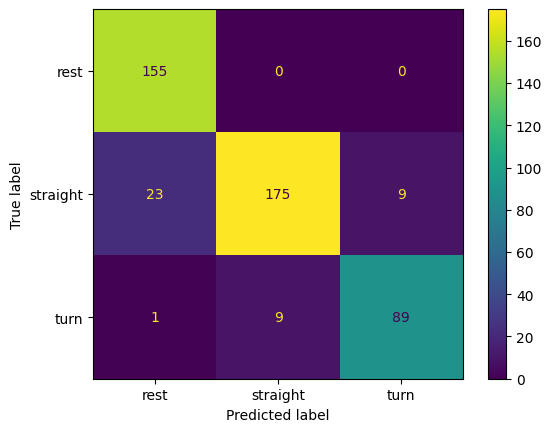

In [72]:
y_pred = grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid.classes_).plot()
print("n\Classification Report:\n")
print(classification_report(y_test, y_pred))


___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [77]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [78]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [81]:
# TODO - Print test score accuracies for test_set1 and test_set2
X1 = X1[X_train.columns]
X2 = X2[X_train.columns]
test_set1_score = grid.score(X1, y1)
test_set2_score =grid.score(X2, y2)
print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.74
test_set2 score: 0.68


In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)


Confusion Matrix for test_set1:
 [[101 130   0]
 [ 16 371  24]
 [  0  34 107]]

Classification Report for test_set1:

              precision    recall  f1-score   support

        rest       0.86      0.44      0.58       231
    straight       0.69      0.90      0.78       411
        turn       0.82      0.76      0.79       141

    accuracy                           0.74       783
   macro avg       0.79      0.70      0.72       783
weighted avg       0.77      0.74      0.72       783



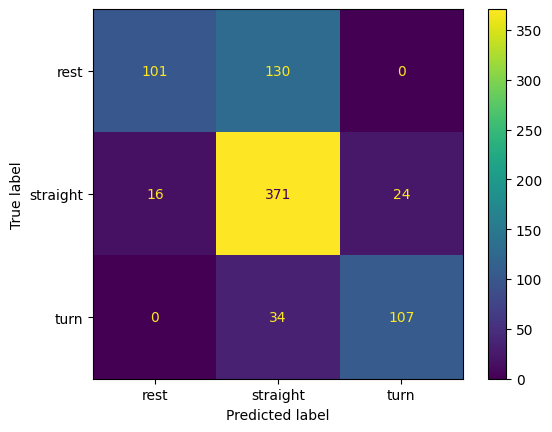

In [83]:
y1_pred = grid.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)
print("\nConfusion Matrix for test_set1:\n", conf_matrix1)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix1, display_labels=grid.classes_).plot()
print("\nClassification Report for test_set1:\n")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)


Confusion Matrix for test_set2:
 [[  1  15   0]
 [  0 143  63]
 [  0  18  57]]

Classification Report for test_set2:

              precision    recall  f1-score   support

        rest       1.00      0.06      0.12        16
    straight       0.81      0.69      0.75       206
        turn       0.47      0.76      0.58        75

    accuracy                           0.68       297
   macro avg       0.76      0.51      0.48       297
weighted avg       0.74      0.68      0.67       297



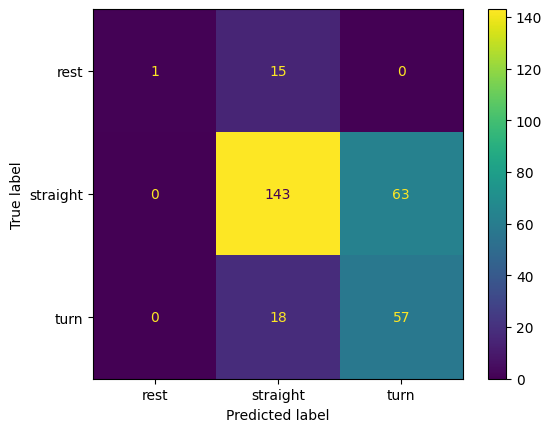

In [85]:
y2_pred = grid.predict(X2)
conf_matrix2 = confusion_matrix(y2, y2_pred)
print("\nConfusion Matrix for test_set2:\n", conf_matrix2)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix2, display_labels=grid.classes_).plot()
print("\nClassification Report for test_set2:\n")
print(classification_report(y2, y2_pred))

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

```
# This is formatted as code
```
1. Comparision of Models

The model trained in Section 4 with PCA
performed slightly better than the model in Section 1 (using all featured), likely due to rduced noise and redundancy.


Models in Section 2 and 3 outperformed Section 4 because feature selection methods preserved featured more relevant to the target variable.

Section 1 underperformed compared to other models due to overfitting and the inclusion of irrelevant or redundant features.
2. Explanations for Observation Differences:

PCA in Section 4 helped reduce noise and dimensionality but may have discarded features important for prediction.

Feature selection in Sections 2 and 3improved performance by focusing on relevant features.

Using all featured in Section 1 led to poorer generalization due to overfitting and noise.



____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.

In [ ]:
# TODO - Load group selected features from cv_set to X
# X =
X.head(2)

,gx_var,gy_sum,ax_min,ay_max,gz_sum
0,2.365611e-09,0.001406,-0.001539,0.000544,-0.001391
1,2.242613e-09,0.000103,-0.001752,0.000615,-0.001943


In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform train/test split

In [ ]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 mark)
# pipe =

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =

In [ ]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

,gx_var,gy_sum,ax_min,ay_max,gz_sum
0,3.655217e-09,0.000218,-0.001191,0.000845,-0.001143
1,3.349120e-09,-0.000523,-0.001104,0.000949,-0.001999


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

,gx_var,gy_sum,ax_min,ay_max,gz_sum
0,1.718706e-09,0.001311,-0.002970,0.002993,-0.001901
1,2.179497e-09,0.001898,-0.003824,0.004106,-0.002051


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1.


____